# Practical 2

## Goals
1.  Plotting graphs using
    [matplotlib](https://matplotlib.org/api/pyplot_api.html)
2.  Reading and plotting image histograms.
3.  Working with
    [clustering](http://scikit-learn.org/stable/modules/clustering.html)
    and
    [classification](http://scikit-learn.org/stable/modules/svm.html)
    algorithms



## Exercise 1 \[★\]

[matplotlib](https://matplotlib.org/api/pyplot_api.html) can be used to
plot graphs. Given below is a very simple code with only x values. After
importing the *matplotlib* library, we initialize x values and plot it.



In [ ]:
import matplotlib.pyplot as plot

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plot.plot(x)
plot.show()

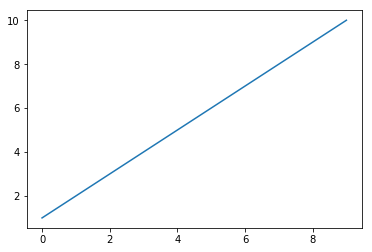



Now let's change the color, style and width of the line.



In [ ]:
import matplotlib.pyplot as plot

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plot.plot(x, linewidth=3, drawstyle="steps", color="#00363a")
plot.show()

We will now initialize the y-values and plot the graph.

In [ ]:
import matplotlib.pyplot as plot

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [0, 1, 0, 0, 1, 0, 1, 1, 1, 0]
plot.plot(x, y, linewidth=3, drawstyle="steps", color="#00363a")
plot.show()

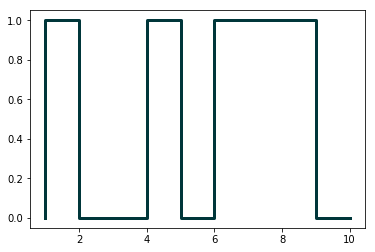



In the [first practical session](./practicals1.html), we saw how to
parse JSON files. Continuing with the same
[JSON](../../data/pl.json) file, we will now plot the results
of number of programming languages released per year. Verify the output.



In [ ]:
from pandas import json_normalize
import pandas as pd
import json
import matplotlib.pyplot as plot

data = json.load(open("../../data/pl.json"))
dataframe = json_normalize(data)
grouped = dataframe.groupby("year").count()
plot.plot(grouped)
plot.show()

Following program will add title and labels to the x-axis and y-axis.



In [ ]:
from pandas import json_normalize
import pandas as pd
import json
import matplotlib.pyplot as plot

data = json.load(open("../../data/pl.json"))
dataframe = json_normalize(data)
grouped = dataframe.groupby("year").count()
plot.plot(grouped)
plot.title("Programming languages per year")
plot.xlabel("year", fontsize=16)
plot.ylabel("count", fontsize=16)
plot.show()

There is yet another way to plot the dataframes, by using
[pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html).



In [ ]:
from pandas import json_normalize
import pandas as pd
import json
import matplotlib.pyplot as plot

data = json.load(open("../../data/pl.json"))
dataframe = json_normalize(data)
grouped = dataframe.groupby("year").count()
grouped = grouped.rename(columns={"languageLabel": "count"}).reset_index()
grouped.plot(x=0, kind="bar", title="Programming languages per year")

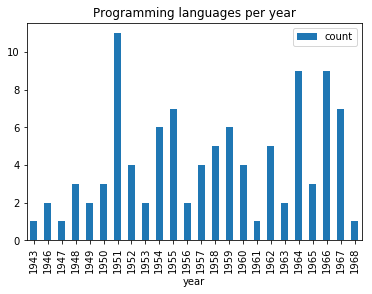

Now, we want to create multiple subplots. A simple way is given below.
Recall in [first practical session](./practicals1.html), we did `group by`
on multiple columns. Subplots can be used to visualize these data.



In [ ]:
from pandas import json_normalize
import pandas as pd
import json
import math
import matplotlib.pyplot as plot

jsondata = json.load(open("../../data/plparadigm.json"))
array = []
for data in jsondata:
    array.append([data["year"], data["languageLabel"], data["paradigmLabel"]])
dataframe = pd.DataFrame(array, columns=["year", "languageLabel", "paradigmLabel"])
dataframe = dataframe.astype(
    dtype={"year": "int64", "languageLabel": "<U200", "paradigmLabel": "<U200"}
)
grouped = dataframe.groupby(["paradigmLabel", "year"]).count()
grouped = grouped.rename(columns={"languageLabel": "count"})
grouped = grouped.groupby(["paradigmLabel"])
# Initialization of subplots
nr = math.ceil(grouped.ngroups / 2)
fig, axes = plot.subplots(nrows=nr, ncols=2, figsize=(20, 25))
# Creation of subplots
for i, group in enumerate(grouped.groups.keys()):
    g = grouped.get_group(group).reset_index()
    g.plot(
        x="year", y="count", kind="bar", title=group, ax=axes[math.floor(i / 2), i % 2]
    )
plot.show()

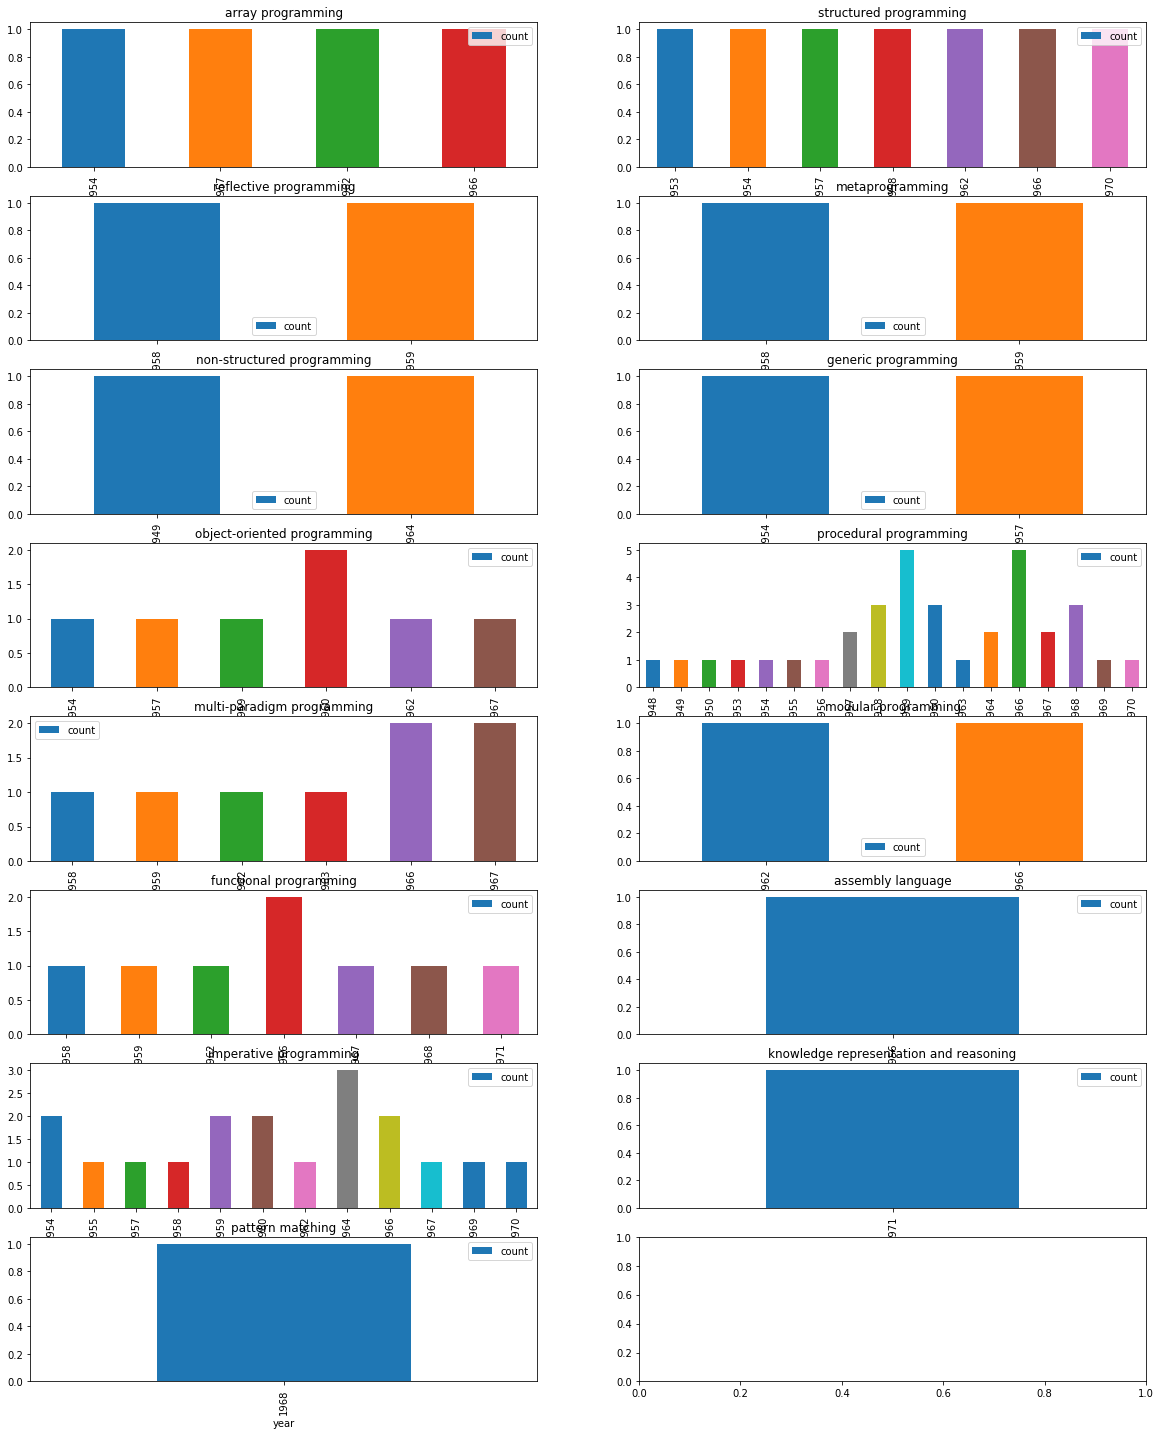

**Question 1**

Make changes to the above code, so that we can get visual information on
count of languages of different programming paradigms released in every
available year, i.e, for each year, we want to see the count of
programming languages belonging to each programming language paradigm.

**Question 2**

Detect peak years for language creation :
- Identify the top 5 years with the highest number of new programming languages.
- Plot these years with a highlighted bar in the graph.

## Exercise 2 \[★\]
In this exercise, we will work on images. Download an image (e.g.,
[picture.bmp](../../images/picture.bmp) and
[flower.jpg](../../images/flower.jpg)) in your current
working folder and open it in the following manner. We will first try to
get some metadata of the image.



In [ ]:
import os, sys
from PIL import Image

imgfile = Image.open("../../images/picture.bmp")
print(imgfile.size, imgfile.format)

We use Image module of Python PIL library
([Documentation](http://www.effbot.org/imagingbook/image.htm)). We will
now try to get data of 100 pixels from an image.



In [ ]:
import os, sys
from PIL import Image

imgfile = Image.open("../../images/flower.jpg")
data = imgfile.getdata()
for i in range(10):
    for j in range(10):
        print(i, j, data.getpixel((i, j)))

You may notice the pixel position and pixel values (a tuple of 3
values). Let's try to get additional metadata of the images, i.e., mode
of image (e.g., RGB), number of bands, number of bits for each band,
width and height of image (in pixels).



In [ ]:
import os, sys
from PIL import Image

imgfile = Image.open("../../images/flower.jpg")
print(imgfile.mode, imgfile.getbands(), imgfile.bits, imgfile.width, imgfile.height)

We can also get additional information from the images like the EXIF (Exchangeable image file format) information. In some cases, the EXIF information of images is deleted (because they may contain private information).

In [ ]:
import os, sys
from PIL import Image
from PIL.ExifTags import TAGS

imgfile = Image.open("../../images/flower.jpg")
exif_data = imgfile._getexif()

if exif_data:  # if there is some EXIF information
    for tag, value in exif_data.items():
        if tag in TAGS:
            print(TAGS[tag], value)

Let's now get an histogram of colors. When you execute the following
code, you will get a single array of values, frequency of each band (R,
G, B etc.) concatenated together. In the following code, we will assume
that we are working with an image of 3 bands (RGB mode) and each band is
represented by 8 bits. We will plot the
[histogram](http://www.effbot.org/imagingbook/image.htm#tag-Image.Image.histogram)
of different colors.



In [ ]:
from PIL import Image
import matplotlib.pyplot as plot

imgfile = Image.open("../../images/flower.jpg")
histogram = imgfile.histogram()
# we have three bands (for this image)
red = histogram[0:255]
green = histogram[256:511]
blue = histogram[512:767]
fig, (axis1, axis2, axis3) = plot.subplots(nrows=3, ncols=1)
axis1.plot(red, color="red")
axis2.plot(green, color="green")
axis3.plot(blue, color="blue")
plot.show()

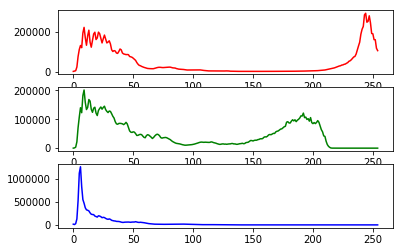

But if you wish to see all of them in one single plot.



In [ ]:
from PIL import Image
import matplotlib.pyplot as plot

imgfile = Image.open("../../images/flower.jpg")
histogram = imgfile.histogram()
red = histogram[0:255]
green = histogram[256:511]
blue = histogram[512:767]
x = range(255)
y = []
for i in x:
    y.append((red[i], green[i], blue[i]))
plot.plot(x, y)
plot.show()

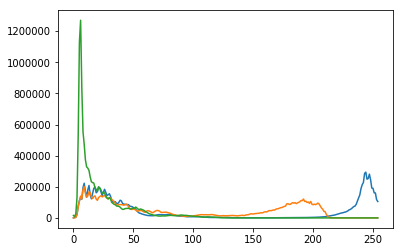

But we do not wish to loose the band colors.



In [ ]:
from PIL import Image
import matplotlib.pyplot as plot

imgfile = Image.open("../../images/flower.jpg")
histogram = imgfile.histogram()
red = histogram[0:255]
green = histogram[256:511]
blue = histogram[512:767]
x = range(255)
y = []
for i in x:
    y.append((red[i], green[i], blue[i]))
figure, axes = plot.subplots()
axes.set_prop_cycle("color", ["red", "green", "blue"])
plot.plot(x, y)
plot.show()

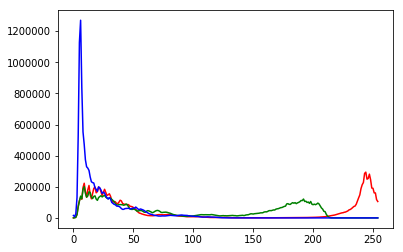


Let's visualize the spatial distribution of color intensities using a heatmap.

In [ ]:
!pip install opencv-python seaborn

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load image
image = cv2.imread("../../images/flower.jpg")  # Replace with your image path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Split channels
red_channel, green_channel, blue_channel = cv2.split(image)

# Plot heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(red_channel, cmap="Reds", ax=axes[0])
axes[0].set_title("Red Channel")

sns.heatmap(green_channel, cmap="Greens", ax=axes[1])
axes[1].set_title("Green Channel")

sns.heatmap(blue_channel, cmap="Blues", ax=axes[2])
axes[2].set_title("Blue Channel")

plt.show()

**Question 1**

Your next question is to get the top 20 intensities in each band (R,G, B) and
create a single plot of these top intensities. Write a python program
that can achieve this.

**Question 2**

#### Histogram Normalization & Equalization

Modify the histogram visualization program to apply histogram equalization on the image before plotting the histogram. Compare the original and equalized histograms in a subplot.

**Hint**: Use `cv2.equalizeHist()` from OpenCV for grayscale images or implement your own normalization for RGB.

## Exercise 3 \[★★\]
In this exercise, we will take a look at [KMeans clustering
algorithm](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).
Continuing with images, we will now find 4 predominant colors in an
image.

In [ ]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
clusters = KMeans(n_clusters=4, n_init=2)
clusters.fit(numarray)
npbins = numpy.arange(0, 5)
histogram = numpy.histogram(clusters.labels_, bins=npbins)
labels = numpy.unique(clusters.labels_)
barlist = plot.bar(labels, histogram[0])
for i in range(4):
    barlist[i].set_color(
        "#%02x%02x%02x"
        % (
            math.ceil(clusters.cluster_centers_[i][0]),
            math.ceil(clusters.cluster_centers_[i][1]),
            math.ceil(clusters.cluster_centers_[i][2]),
        )
    )
plot.show()

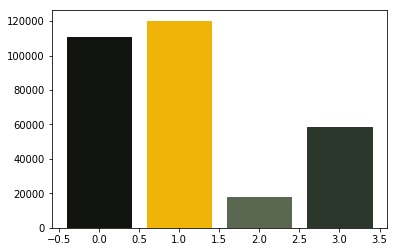

**Question 1**

For your next question, your goal is to understand the above code and
achieve the following:
1.  Assume that the number of clusters is given by the user, generalize
    the above code.
2.  In case of bar chart, ensure that the bars are arranged in the
    descending order of the frequency of colors.
3.  Also add support for pie chart in addition to the bar chart. Ensure
    that we use the image colors as the wedge colors. (e.g., given
    below)
4.  Do you have any interesting observations?


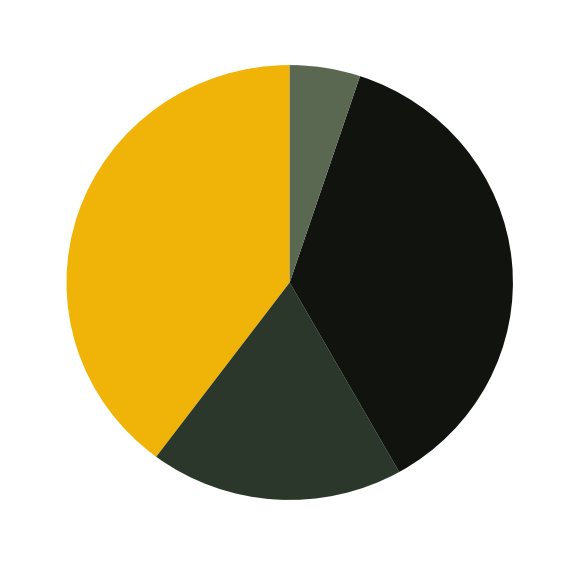

**Question 2**

Your next question involves configuring the KMeans algorithm in different ways:

1. **Cluster Initialization Impact:** The `KMeans` algorithm uses `n_init=2` in the given code. How does changing the value of `n_init` affect the clustering results? Try different values and discuss your observations.  

2. **Alternative Color Representations:** The code uses RGB values to represent colors. Modify the implementation to display colors using an alternative color space (e.g., HSV or LAB). How do the results compare to using RGB?

## Exercise 4 \[★★\]
We will try to get more clusters and also check the time taken by each
of these algorithms.
Let's start with some very simple exercises to experiment with the
KMeans algorithm. Consider the following data and visualize it
using a scatter plot.



In [ ]:
import numpy as np
import matplotlib.pyplot as plot

numarray = np.array(
    [
        [1, 1],
        [1, 2],
        [1, 3],
        [1, 4],
        [1, 5],
        [1, 6],
        [1, 7],
        [1, 8],
        [1, 9],
        [1, 10],
        [10, 1],
        [10, 2],
        [10, 3],
        [10, 4],
        [10, 5],
        [10, 6],
        [10, 7],
        [10, 8],
        [10, 9],
        [10, 10],
    ]
)

plot.scatter(numarray[:, 0], numarray[:, 1])
plot.show()

Visually, it is quite evident that there are two clusters. But let's
use KMeans algorithm to obtain the 2 clusters. We will first see the
labels of our clustered data.



In [ ]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

numarray = np.array(
    [
        [1, 1],
        [1, 2],
        [1, 3],
        [1, 4],
        [1, 5],
        [1, 6],
        [1, 7],
        [1, 8],
        [1, 9],
        [1, 10],
        [10, 1],
        [10, 2],
        [10, 3],
        [10, 4],
        [10, 5],
        [10, 6],
        [10, 7],
        [10, 8],
        [10, 9],
        [10, 10],
    ]
)

clusters = KMeans(n_clusters=2, n_init=2)
clusters.fit(numarray)
print(clusters.labels_)

Now, we will visualize the clusters using a scatter plot. We will use
two colors for visually distinguishing them.



In [ ]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

numarray = np.array(
    [
        [1, 1],
        [1, 2],
        [1, 3],
        [1, 4],
        [1, 5],
        [1, 6],
        [1, 7],
        [1, 8],
        [1, 9],
        [1, 10],
        [10, 1],
        [10, 2],
        [10, 3],
        [10, 4],
        [10, 5],
        [10, 6],
        [10, 7],
        [10, 8],
        [10, 9],
        [10, 10],
    ]
)

clusters = KMeans(n_clusters=2, n_init=2)
clusters.fit(numarray)
colors = np.array(["#ff0000", "#00ff00"])

plot.scatter(numarray[:, 0], numarray[:, 1], c=colors[clusters.labels_])
plot.show()

What if we tried to obtain 4 clusters? Try running the following code,
multiple times. Any observation? Try changing the value of *n_init*
with higher values.



In [ ]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

numarray = np.array(
    [
        [1, 1],
        [1, 2],
        [1, 3],
        [1, 4],
        [1, 5],
        [1, 6],
        [1, 7],
        [1, 8],
        [1, 9],
        [1, 10],
        [10, 1],
        [10, 2],
        [10, 3],
        [10, 4],
        [10, 5],
        [10, 6],
        [10, 7],
        [10, 8],
        [10, 9],
        [10, 10],
    ]
)

clusters = KMeans(n_clusters=4, n_init=2)
clusters.fit(numarray)
colors = np.array(["#ff0000", "#00ff00", "#0000ff", "#ffff00"])

plot.scatter(numarray[:, 0], numarray[:, 1], c=colors[clusters.labels_])
plot.show()

Now we will try obtaining clusters with some real data (reference:
[citypopulation.json](../../data/citypopulation.json),
Source: Wikidata). It contains information concerning different cities
of the world: city name, year of its foundation and its population in
the year 2010. In the following code, we want to cluster population data
and to observe whether there is any correlation between age and recent
population (2010) statistics. In the following code, there is a
commented line. You can un-comment it to try with different population
numbers. Any observation? Why did we use LabelEncoder? What is its
purpose?



In [ ]:
from pandas import json_normalize
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import json

data = json.load(open("../../data/citypopulation.json"))
dataframe = json_normalize(data)
le = LabelEncoder()
dataframe["cityLabel"] = le.fit_transform(dataframe["cityLabel"])
dataframe = dataframe.astype(
    dtype={"year": "<i4", "cityLabel": "<U200", "population": "i"}
)
dataframe = dataframe.loc[dataframe["year"] > 1500]
# dataframe = dataframe.loc[dataframe['population'] < 700000]
yearPopulation = dataframe[["year", "population"]]
clusters = KMeans(n_clusters=2, n_init=1000)
clusters.fit(yearPopulation.values)
colors = np.array(["#ff0000", "#00ff00", "#0000ff", "#ffff00"])

plot.rcParams["figure.figsize"] = [10, 10]
plot.scatter(
    yearPopulation["year"], yearPopulation["population"], c=colors[clusters.labels_]
)
plot.show()

Now let's continue working with
[flower.jpg](../../images/flower.jpg). Let's start once
again with **KMeans** and try to get clusters of size between 2 and 11.



In [ ]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
X = []
Y = []
fig, axes = plot.subplots(nrows=5, ncols=2, figsize=(20, 25))
xaxis = 0
yaxis = 0
for x in range(2, 12):
    cluster_count = x

    clusters = KMeans(n_clusters=cluster_count, n_init=2)
    clusters.fit(numarray)

    npbins = numpy.arange(0, cluster_count + 1)
    histogram = numpy.histogram(clusters.labels_, bins=npbins)
    labels = numpy.unique(clusters.labels_)
    barlist = axes[xaxis, yaxis].bar(labels, histogram[0])
    if yaxis == 0:
        yaxis = 1
    else:
        xaxis = xaxis + 1
        yaxis = 0
    for i in range(cluster_count):
        barlist[i].set_color(
            "#%02x%02x%02x"
            % (
                math.ceil(clusters.cluster_centers_[i][0]),
                math.ceil(clusters.cluster_centers_[i][1]),
                math.ceil(clusters.cluster_centers_[i][2]),
            )
        )
plot.show()

Your next goal is to test the above code for cluster sizes between 2 and
21 which will give you the figure given below.

**Note**: The following image was generated after 6
minutes. Optionally, you can add *print* statements to test whether your
code is working fine.

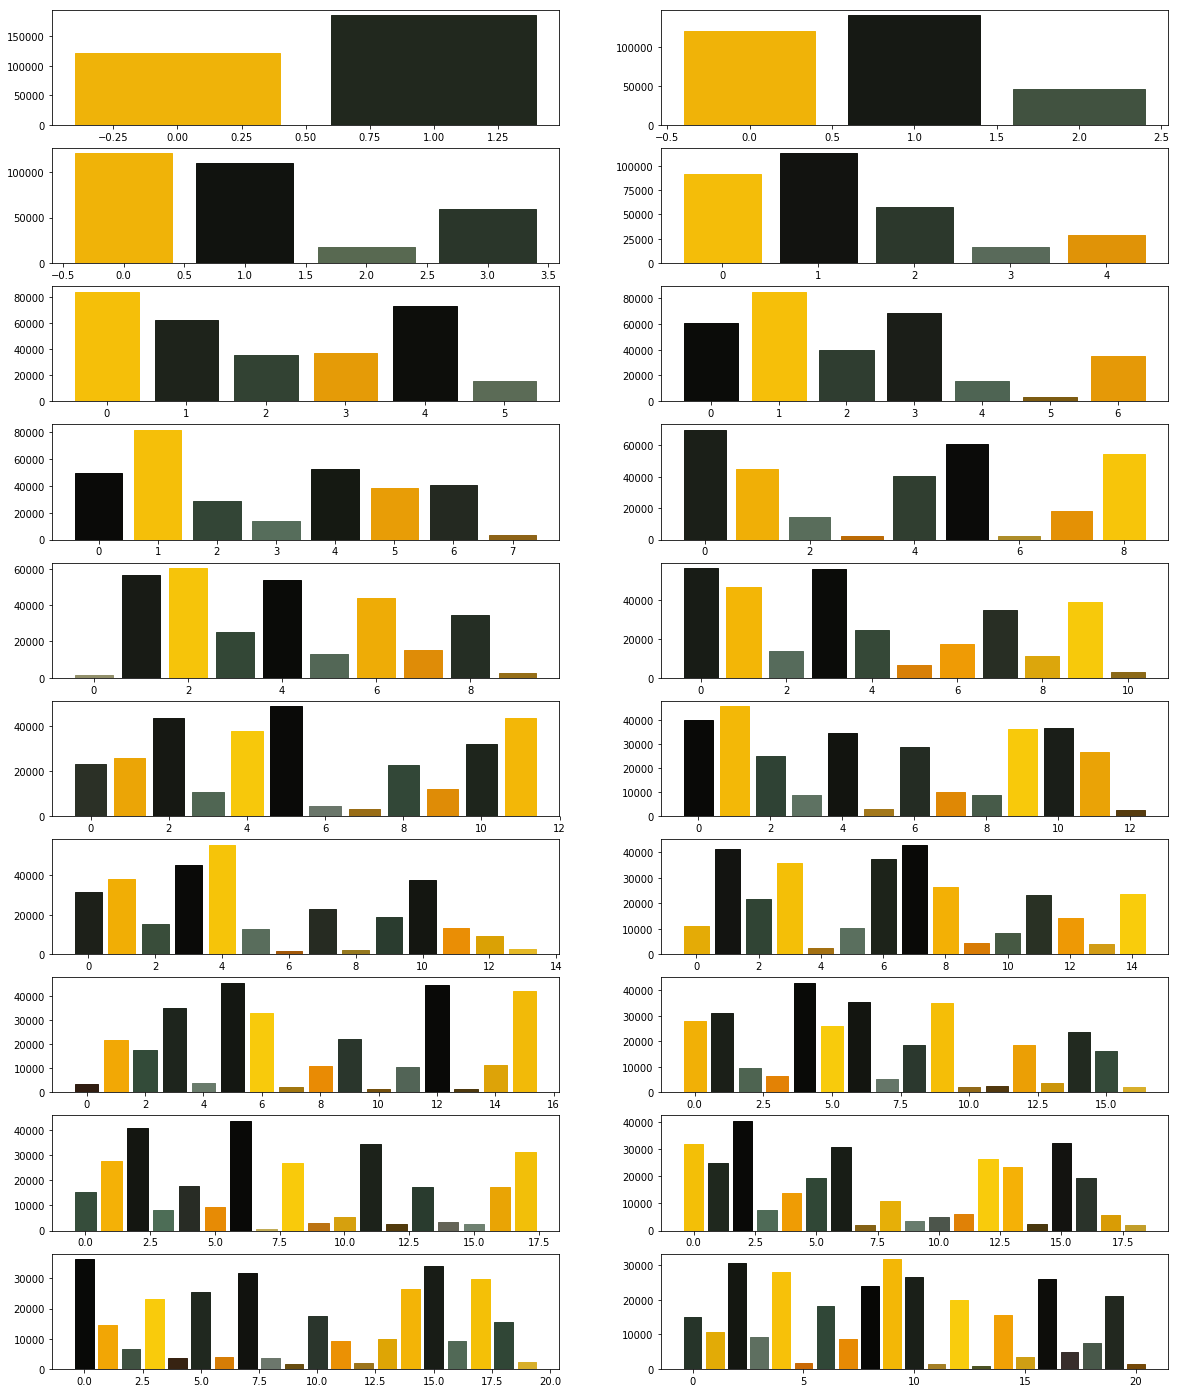
Now we modify the above algorithm to use **MiniBatchKMeans** clustering
algorithm (refer
[here](http://scikit-learn.org/stable/modules/clustering.html#mini-batch-kmeans)).
Observe the changes.



In [ ]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import MiniBatchKMeans

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
X = []
Y = []
fig, axes = plot.subplots(nrows=5, ncols=2, figsize=(20, 25))
xaxis = 0
yaxis = 0
for x in range(2, 12):
    cluster_count = x

    clusters = MiniBatchKMeans(n_clusters=cluster_count, n_init=2)
    clusters.fit(numarray)

    npbins = numpy.arange(0, cluster_count + 1)
    histogram = numpy.histogram(clusters.labels_, bins=npbins)
    labels = numpy.unique(clusters.labels_)
    barlist = axes[xaxis, yaxis].bar(labels, histogram[0])
    if yaxis == 0:
        yaxis = 1
    else:
        xaxis = xaxis + 1
        yaxis = 0
    for i in range(cluster_count):
        barlist[i].set_color(
            "#%02x%02x%02x"
            % (
                math.ceil(clusters.cluster_centers_[i][0]),
                math.ceil(clusters.cluster_centers_[i][1]),
                math.ceil(clusters.cluster_centers_[i][2]),
            )
        )
plot.show()

What did you observe? Your next goal is to test the above code for
cluster sizes between 2 and 21 which will give you the figure given
below.
What are your conclusions?
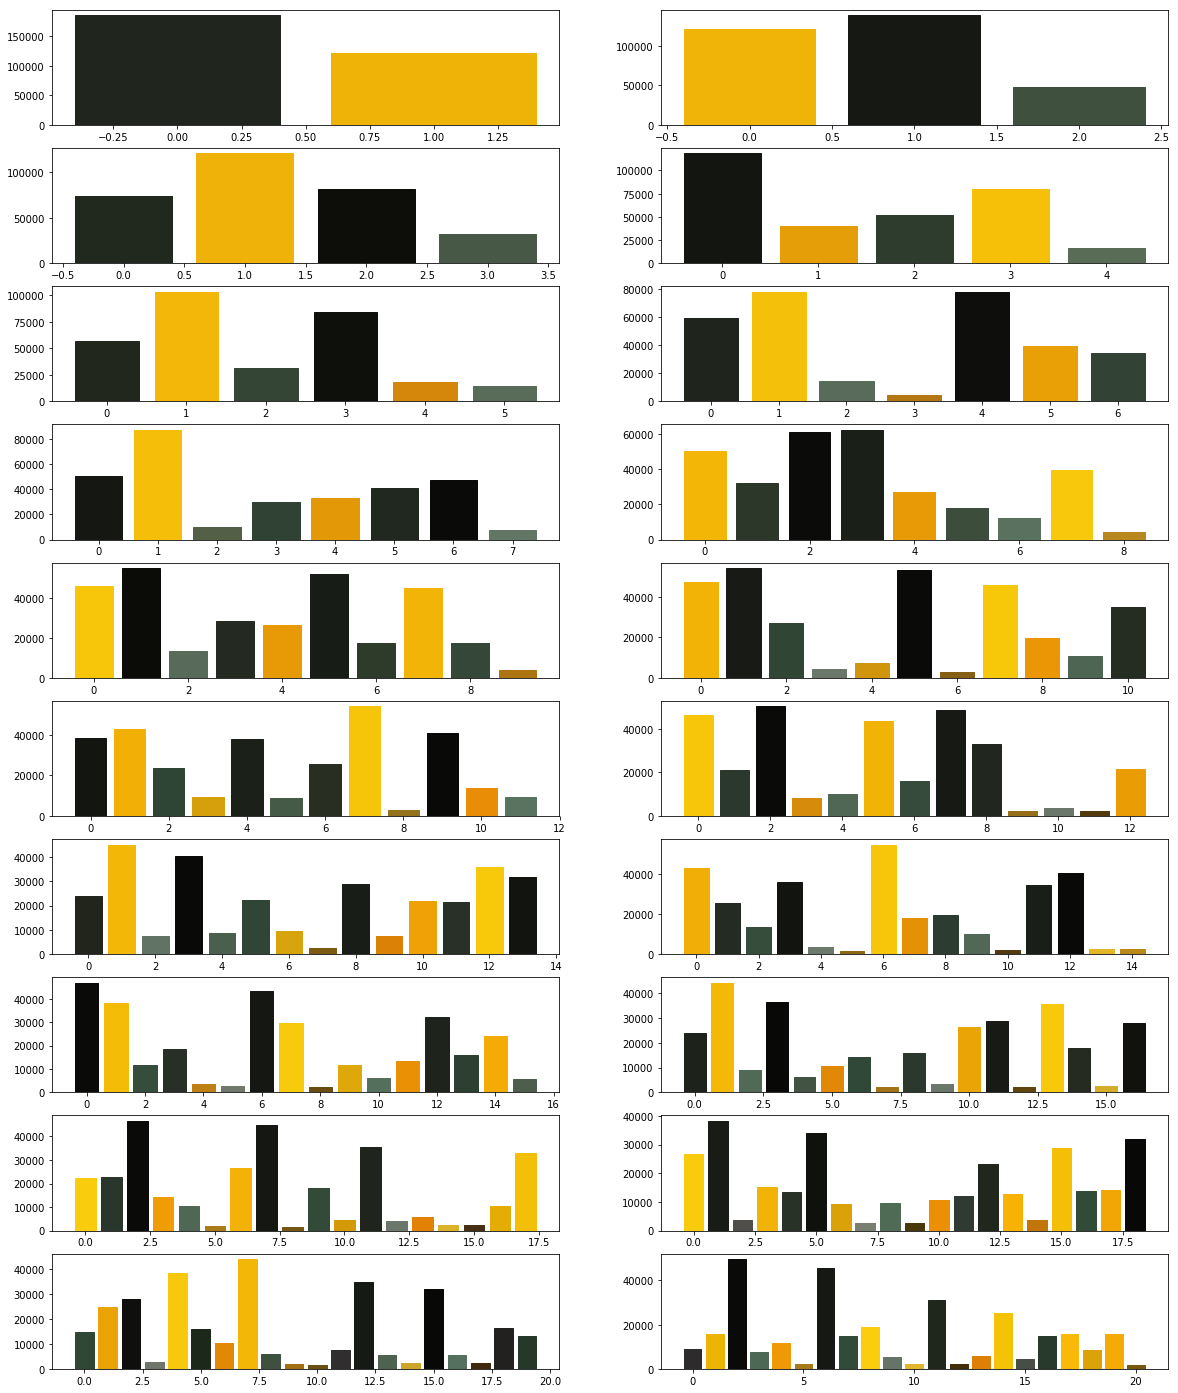
In order to compare the two algorithms, we consider the time taken by
each of these algorithms. We will repeat the above experiment, but this
time we will plot the time taken to obtain clusters of different sizes.
We start with **KMeans**.



In [ ]:
from PIL import Image
import numpy
import math
import time
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
X = []
Y = []
for x in range(1, 20):
    cluster_count = x

    start_time = time.time()
    clusters = KMeans(n_clusters=cluster_count, n_init=2)
    clusters.fit(numarray)
    end_time = time.time()
    total_time = end_time - start_time
    print("Total time: ", x, ":", total_time)
    X.append(x)
    Y.append(total_time)
plot.bar(X, Y)
plot.show()

You may get a graph similar to the following.

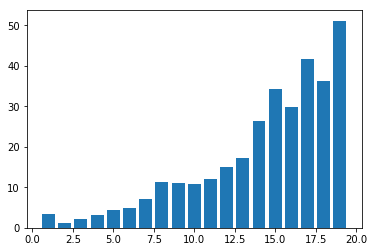

We now use **MiniBatchKMeans**.

In [ ]:

from PIL import Image
import numpy
import math
import time
import matplotlib.pyplot as plot
from sklearn.cluster import MiniBatchKMeans


    
imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
X = []
Y = []
for x in range(1, 20):
    cluster_count = x

    start_time = time.time()
    clusters = MiniBatchKMeans(n_clusters=cluster_count, n_init=2)
    clusters.fit(numarray)
    end_time = time.time()
    total_time = end_time - start_time
    print("Total time: ", x, ":", total_time)
    X.append(x)
    Y.append(total_time)
plot.bar(X, Y)
plot.show()

You may get a graph similar to the following.

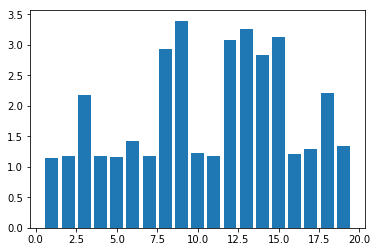

Now test the above code using **MiniBatchKMeans** algorithm with cluster
sizes between 2 and 50. What are your observations?
Finally we want to see whether we get the same cluster centers from both
the algorithms. Run the following program to see the cluster centers
produced by the two algorithms. We use two different colors (red and
black) to distinguish the cluster centers from the two algorithms.



In [ ]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)

cluster_count = 10

clusters = KMeans(n_clusters=cluster_count, n_init=2)
clusters.fit(numarray)

mclusters = MiniBatchKMeans(n_clusters=cluster_count, n_init=2)
mclusters.fit(numarray)

fig, axes = plot.subplots(nrows=3, ncols=1, figsize=(20, 25))
# Scatter plot for RG (RGB)
axes[0].scatter(numarray[:, 0], numarray[:, 1])
axes[0].scatter(
    clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], c="red"
)
axes[0].scatter(
    mclusters.cluster_centers_[:, 0], mclusters.cluster_centers_[:, 1], c="black"
)

# Scatter plot of RB (RGB)
axes[1].scatter(numarray[:, 0], numarray[:, 2])
axes[1].scatter(
    clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 2], c="red"
)
axes[1].scatter(
    mclusters.cluster_centers_[:, 0], mclusters.cluster_centers_[:, 2], c="black"
)

# Scatter plot of GB (RGB)
axes[2].scatter(numarray[:, 1], numarray[:, 2])
axes[2].scatter(
    clusters.cluster_centers_[:, 1], clusters.cluster_centers_[:, 2], c="red"
)
axes[2].scatter(
    mclusters.cluster_centers_[:, 1], mclusters.cluster_centers_[:, 2], c="black"
)

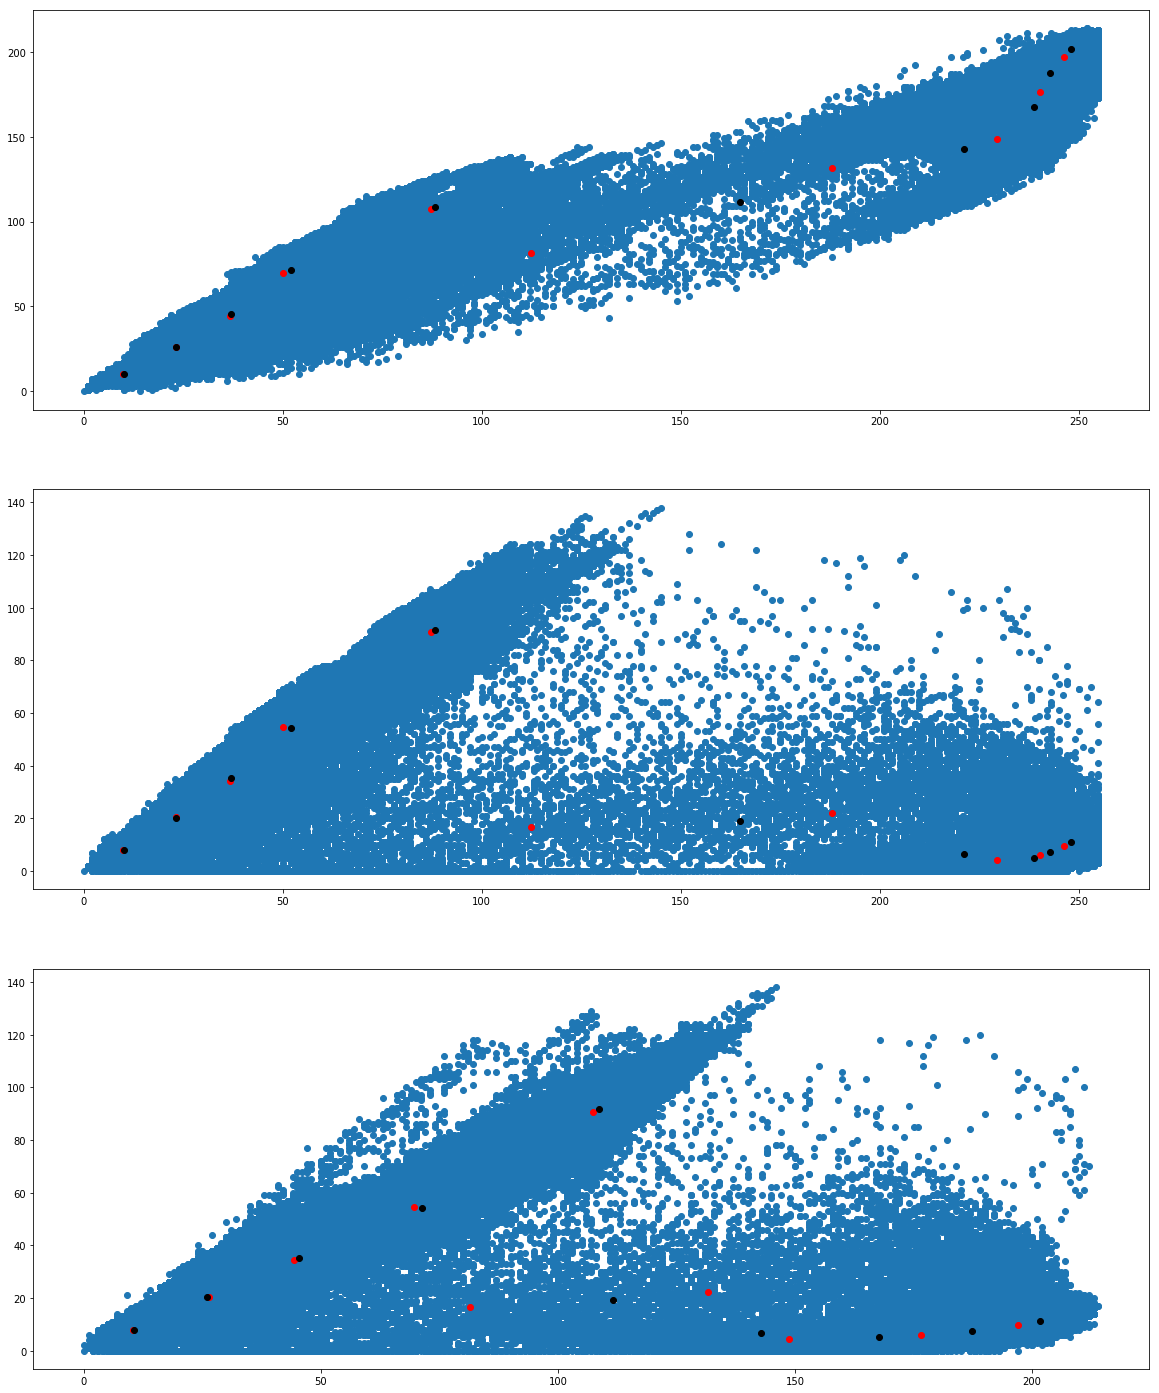
We would like to see how the individual pixel values have been
clustered. Run the following program a couple of times.



In [ ]:
from PIL import Image
import numpy
import math
import time
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)

cluster_count = 10

mclusters = MiniBatchKMeans(n_clusters=cluster_count, n_init=2)
mclusters.fit(numarray)

npbins = numpy.arange(0, cluster_count + 1)
histogram = numpy.histogram(mclusters.labels_, bins=npbins)
labels = numpy.unique(mclusters.labels_)

fig, axes = plot.subplots(nrows=3, ncols=2, figsize=(20, 25))

# Scatter plot for RG (RGB)
colors = []
for i in range(len(numarray)):
    j = mclusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(mclusters.cluster_centers_[j][0]),
            math.ceil(mclusters.cluster_centers_[j][1]),
            0,
        )
    )

axes[0, 0].scatter(numarray[:, 0], numarray[:, 1], c=colors)
axes[0, 0].scatter(
    mclusters.cluster_centers_[:, 0],
    mclusters.cluster_centers_[:, 1],
    marker="+",
    c="red",
)

# Scatter plot for RB (RGB)
colors = []
for i in range(len(numarray)):
    j = mclusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(mclusters.cluster_centers_[j][0]),
            0,
            math.ceil(mclusters.cluster_centers_[j][2]),
        )
    )

axes[1, 0].scatter(numarray[:, 0], numarray[:, 2], c=colors)
axes[1, 0].scatter(
    mclusters.cluster_centers_[:, 0],
    mclusters.cluster_centers_[:, 2],
    marker="+",
    c="white",
)

# Scatter plot for GB (RGB)
colors = []
for i in range(len(numarray)):
    j = mclusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            0,
            math.ceil(mclusters.cluster_centers_[j][1]),
            math.ceil(mclusters.cluster_centers_[j][2]),
        )
    )

axes[2, 0].scatter(numarray[:, 1], numarray[:, 2], c=colors)
axes[2, 0].scatter(
    mclusters.cluster_centers_[:, 1],
    mclusters.cluster_centers_[:, 2],
    marker="+",
    c="yellow",
)

clusters = KMeans(n_clusters=cluster_count, n_init=2)
clusters.fit(numarray)

npbins = numpy.arange(0, cluster_count + 1)
histogram = numpy.histogram(clusters.labels_, bins=npbins)
labels = numpy.unique(clusters.labels_)

# Scatter plot for RG (RGB)
colors = []
for i in range(len(numarray)):
    j = clusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(clusters.cluster_centers_[j][0]),
            math.ceil(clusters.cluster_centers_[j][1]),
            0,
        )
    )

axes[0, 1].scatter(numarray[:, 0], numarray[:, 1], c=colors)
axes[0, 1].scatter(
    clusters.cluster_centers_[:, 0],
    clusters.cluster_centers_[:, 1],
    marker="+",
    c="red",
)

# Scatter plot for RB (RGB)
colors = []
for i in range(len(numarray)):
    j = clusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(clusters.cluster_centers_[j][0]),
            0,
            math.ceil(clusters.cluster_centers_[j][2]),
        )
    )

axes[1, 1].scatter(numarray[:, 0], numarray[:, 2], c=colors)
axes[1, 1].scatter(
    clusters.cluster_centers_[:, 0],
    clusters.cluster_centers_[:, 2],
    marker="+",
    c="white",
)

# Scatter plot for GB (RGB)
colors = []
for i in range(len(numarray)):
    j = clusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            0,
            math.ceil(clusters.cluster_centers_[j][1]),
            math.ceil(clusters.cluster_centers_[j][2]),
        )
    )

axes[2, 1].scatter(numarray[:, 1], numarray[:, 2], c=colors)
axes[2, 1].scatter(
    clusters.cluster_centers_[:, 1],
    clusters.cluster_centers_[:, 2],
    marker="+",
    c="yellow",
)
plot.show()

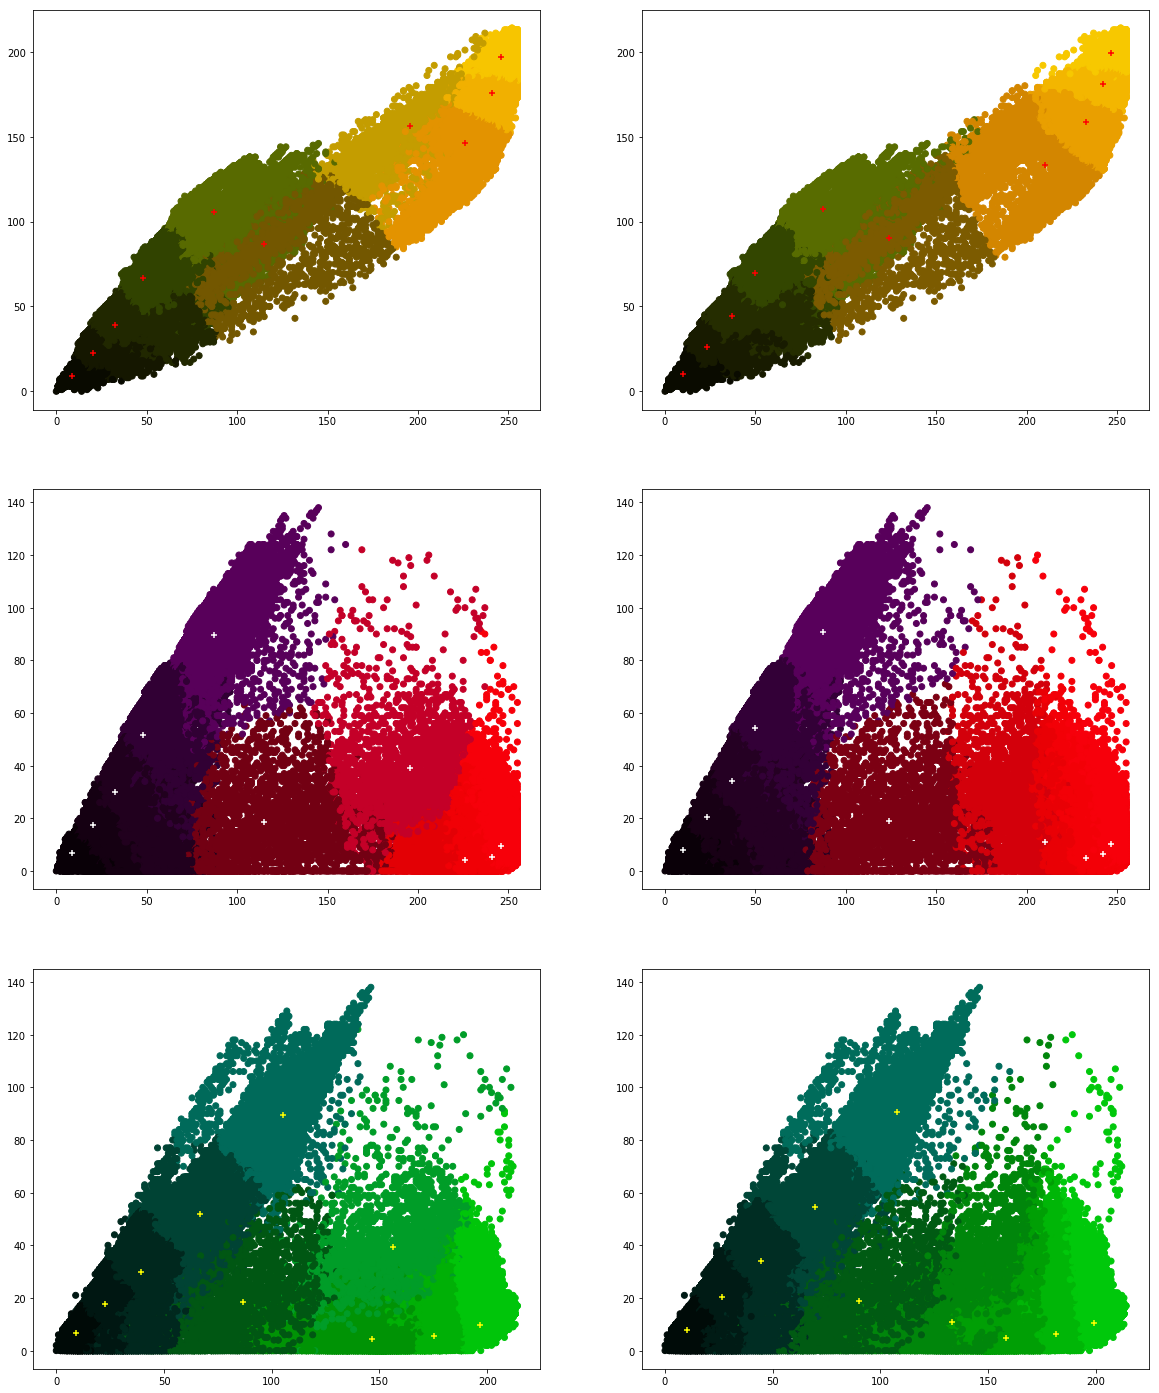


What are your conclusions?

**Question 1**

In this question, you are tasked with clustering a set of images using KMeans and MiniBatchKMeans and evaluating its scalability.

a. **Image Clustering**:
- Use a set of 5 images of varying content (e.g., nature, cityscapes, abstract art).
- Apply MiniBatchKMeans with different values for n_clusters (2, 4, 6, 8) to identify the predominant colors in each image.

b. **Performance Profiling**:
- For each image and cluster count, profile the execution time and memory usage of the clustering process using time and memory_profiler.
- Create a bar chart comparing execution time and memory usage for each image at different cluster counts.

**Hint** : memory_profiler can be used in the following manner

In [ ]:
!pip install memory_profiler

In [ ]:
%load_ext memory_profiler

import numpy as np

def my_function():
    arr = np.random.rand(1000, 1000)
    return arr

%memit my_function()

## Exercise 5 [★★★]

Finally, we plot these clusters in 3D. Test the following graph with different images and different numbers of clusters.

In [ ]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import scale, minmax_scale

cluster_count = 10

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)

# Calculating the clusters
clusters = KMeans(n_clusters=cluster_count, n_init=2)
clusters.fit(numarray)


# Calculating the number of pixels belonging to each cluster
unique, frequency = numpy.unique(clusters.labels_, return_counts=True)

# Scaling the frequency value between 50 and 2000 (these values were randomly chosen)
scaled_frequency = minmax_scale(frequency, feature_range=(50, 2000))

colors = []
for i in range(len(clusters.cluster_centers_)):
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(clusters.cluster_centers_[i][0]),
            math.ceil(clusters.cluster_centers_[i][1]),
            math.ceil(clusters.cluster_centers_[i][2]),
        )
    )

# 3D scatter plot
plot.figure(figsize=(8, 8))
axes = plot.axes(projection="3d")
axes.scatter3D(
    clusters.cluster_centers_[:, 0],
    clusters.cluster_centers_[:, 1],
    clusters.cluster_centers_[:, 2],
    c=colors,
    s=scaled_frequency,
);

Compare the two approaches (MiniBatchKMeans vs. KMeans)?

In [ ]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import scale, minmax_scale

cluster_count = 10

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)

# Calculating the clusters
clusters = MiniBatchKMeans(n_clusters=cluster_count, n_init=2)
clusters.fit(numarray)


# Calculating the number of pixels belonging to each cluster
unique, frequency = numpy.unique(clusters.labels_, return_counts=True)

# Scaling the frequency value between 50 and 2000 (these values were randomly chosen)
scaled_frequency = minmax_scale(frequency, feature_range=(50, 2000))

colors = []
for i in range(len(clusters.cluster_centers_)):
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(clusters.cluster_centers_[i][0]),
            math.ceil(clusters.cluster_centers_[i][1]),
            math.ceil(clusters.cluster_centers_[i][2]),
        )
    )

# 3D scatter plot
plot.figure(figsize=(8, 8))
axes = plot.axes(projection="3d")
axes.scatter3D(
    clusters.cluster_centers_[:, 0],
    clusters.cluster_centers_[:, 1],
    clusters.cluster_centers_[:, 2],
    c=colors,
    s=scaled_frequency,
);

### Image Segmentation Using KMeans Clustering

Next, we will perform image segmentation using the KMeans clustering algorithm. The goal is to segment the image into regions with similar colors, and then reconstruct the image using the segmented colors.

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the image
imgfile = Image.open("../../images/flower.jpg")
img = np.array(imgfile)

# Reshape the image into a 2D array (each row is a pixel and each column is a color channel)
pixels = img.reshape(-1, 3)

# Apply KMeans clustering to the image pixels
cluster_count = 4  # Experiment with different values (e.g., 3, 6, 10)
kmeans = KMeans(n_clusters=cluster_count, n_init=10)
kmeans.fit(pixels)

# Get the cluster centers (RGB values)
cluster_centers = kmeans.cluster_centers_

# Assign each pixel to the nearest cluster center
segmented_img = cluster_centers[kmeans.labels_].reshape(img.shape)

# Convert the segmented image back to an unsigned 8-bit integer type for displaying
segmented_img = np.clip(segmented_img, 0, 255).astype(np.uint8)

# Display the original and segmented image
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].imshow(img)
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(segmented_img)
axes[1].set_title(f"Segmented Image with {cluster_count} clusters")
axes[1].axis('off')

plt.show()


### The elbow method to determine the optimal number of clusters

In KMeans, the inertia is the sum of squared distances from each point to its assigned cluster center. The elbow method looks for a "knee" or "elbow" point in the graph of inertia as a function of the number of clusters. This "elbow" represents the point at which adding more clusters does not significantly reduce the inertia, which often corresponds to a good number of clusters.

On the x-axis, we have the number of clusters k, and on the y-axis, we plot the inertia value for each k.
As you increase the number of clusters, inertia will decrease, as each data point is assigned to a more specific cluster (closer to its centroid).
You should observe a steep drop in inertia for small values of k, followed by a point where the decrease in inertia becomes much slower. This point is where the "elbow" appears, and it corresponds to an optimal choice for the number of clusters.

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the image
imgfile = Image.open("../../images/flower.jpg")
img = np.array(imgfile)

# Reshape the image into a 2D array (each row is a pixel and each column is a color channel)
pixels = img.reshape(-1, 3)

# List to store the inertia for different number of clusters
inertia_values = []

# Try cluster sizes from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(pixels)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values against the number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


What's the Optimal value of cluster count ?

The **Silhouette Method** evaluates clustering quality by measuring how well each data point fits within its assigned cluster compared to other clusters. It computes a **silhouette score** for each point, defined as:  

$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))} $

where:  
- $a(i)$ is the average distance between a point and others in its cluster.  
- $b(i)$ is the average distance between the point and the nearest other cluster.  

The score ranges from **-1 to 1**:  
- **Close to 1** → Well-clustered  
- **Around 0** → Overlapping clusters  
- **Below 0** → Misclassified  

A higher **average silhouette score** across all points indicates a better clustering configuration. It helps determine the optimal number of clusters **(K)**, complementing the **Elbow Method**.

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.utils import shuffle

# Load the image
imgfile = Image.open("../../images/flower.jpg")
img = np.array(imgfile)

# Reshape the image into a 2D array (each row is a pixel and each column is a color channel)
pixels = img.reshape(-1, 3)

# Sample a subset of pixels (e.g., 10,000 pixels)
sample_size = min(10000, pixels.shape[0])  # Adjust sample size as needed
pixels_sampled = shuffle(pixels, random_state=42)[:sample_size]

# Lists to store inertia and silhouette scores
inertia_values = []
silhouette_scores = []

# Try cluster sizes from 2 to 10 (silhouette score is not defined for k=1)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(pixels)
    
    # Store inertia
    inertia_values.append(kmeans.inertia_)
    
    # Compute silhouette score only on sampled pixels  
    score = silhouette_score(pixels_sampled, kmeans.predict(pixels_sampled))

    silhouette_scores.append(score)

# Plot Elbow Method (Inertia)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia_values, marker='o', label="Inertia")
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='s', color='red', label="Silhouette Score")
plt.title('Silhouette Score for Different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.show()


**Question 1**

### Impact of Scaling Features on Clustering

Before applying KMeans, scale the pixel values of the image using a standard scaler (e.g., `StandardScaler` from sklearn.preprocessing).
- How does scaling the features (pixels) affect the segmentation results?
- Compare the clustered images with and without scaling. What differences do you observe?